In [1]:
!pip freeze

Jinja2==2.7.3
MarkupSafe==0.23
Pillow==2.7.0
PyYAML==3.11
Pygments==2.0.2
Theano==0.6.0
argparse==1.2.1
backports.ssl-match-hostname==3.4.0.2
certifi==14.05.14
holoviews==0.7
ipython==3.0.0
jsonschema==2.4.0
mahotas==1.2.4
matplotlib==1.4.3
mistune==0.5
mock==1.0.1
-e git+git@github.com:Neuroglycerin/neukrill-net-tools.git@fc54f48ca8eff1f267345e4a7f92ad87a3c48fca#egg=neukrill_net-master
nose==1.3.4
numpy==1.9.1
param==1.2.1
ptyprocess==0.4
py==1.4.26
-e git+https://github.com/lisa-lab/pylearn2.git@cf3999e7183f8dcaccccf4dfd2a31bbe3a948a97#egg=pylearn2-neukrillnetchosencommit
pyparsing==2.0.3
pytest==2.6.4
python-dateutil==2.4.0
pytz==2014.10
pyzmq==14.5.0
scikit-image==0.10.1
scikit-learn==0.15.2
scipy==0.14.0
six==1.8.0
terminado==0.5
tornado==4.1
wsgiref==0.1.2


In [2]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [4]:
cd ..

/home/scott/Documents/git/neukrill-net-work


In [5]:
cd ../neukrill-net-work

/home/scott/Documents/git/neukrill-net-work


In [6]:
import sys
import numpy as np
import skimage.io

In [7]:
import imp

In [8]:
import neukrill_net.utils as utils
import neukrill_net.image_processing as image_processing
import neukrill_net.augment as augment

In [9]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
img = skimage.io.imread('data/train/acantharia_protist/100224.jpg')

In [12]:
type(img)

numpy.ndarray

In [13]:
img.shape

(66, 59)

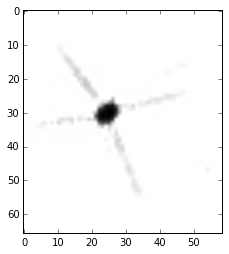

In [14]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

/home/scott/Documents/git/neukrill-venv-auto/local/lib/python2.7/site-packages/skimage/util/dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


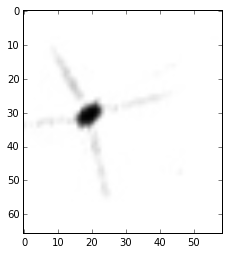

In [15]:
augImg = image_processing.shear_image(img, -10)
iplot = plt.imshow(augImg)
iplot.set_cmap('gray')
show()

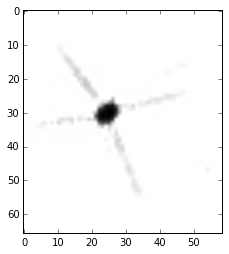

In [16]:
augFunc = augment.RandomAugment()
imgplot = plt.imshow(augFunc(img))
imgplot.set_cmap('gray')

In [17]:
reload(image_processing)
reload(augment)

<module 'neukrill_net.augment' from '/home/scott/Documents/git/neukrill-net-tools/neukrill_net/augment.pyc'>

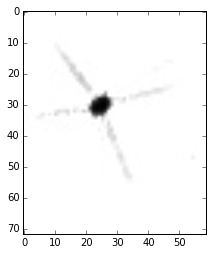

In [18]:
img2 = image_processing.padcrop_image(img,3,0.1)
imgplot = plt.imshow(img2)
imgplot.set_cmap('gray')

In [19]:
augFunc = augment.RandomAugment(units='float64',rotate=-1,rotate_is_resizable=False,shunt=[-0.05,0,0.05])

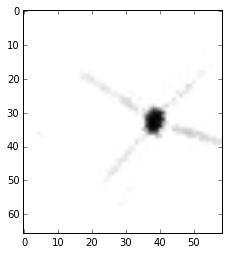

In [20]:
imgplot = plt.imshow(augFunc(img))
imgplot.set_cmap('gray')

In [21]:
augFunc = augment.RandomAugment(units='float64',rotate=-1,rotate_is_resizable=False,flip=True,shear=20,shunt=0.075)

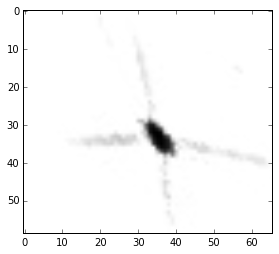

In [22]:
imgplot = plt.imshow(augFunc(img))
imgplot.set_cmap('gray')

In [23]:
augFunc = augment.RandomAugment(units='float64',shear=20)

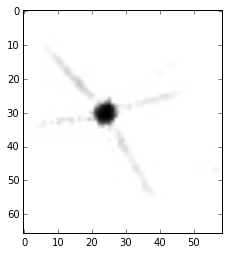

In [24]:
imgplot = plt.imshow(augFunc(img))
imgplot.set_cmap('gray')

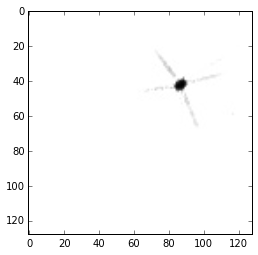

In [25]:
img2 = image_processing.dynamic_shape_fix(img, (128,128), (0.2,0.9))
imgplot = plt.imshow(img2)
imgplot.set_cmap('gray')

In [26]:
reload(augment)
reload(image_processing)

<module 'neukrill_net.image_processing' from '/home/scott/Documents/git/neukrill-net-tools/neukrill_net/image_processing.pyc'>

In [27]:
augFunc = augment.RandomAugment(units='float64',shear=5,rotate=-1,scale=0.1,dynamic_shapefix=1,shape=(128,128))

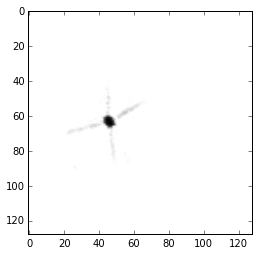

In [28]:
imgplot = plt.imshow(augFunc(img))
imgplot.set_cmap('gray')

In [29]:
augFunc = augment.RandomAugment(units='float64',dynamic_shapefix=1,shape=(80,80),scale=[0.5,1,2])

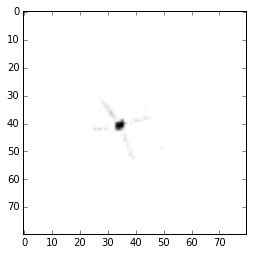

In [30]:
imgplot = plt.imshow(augFunc(img))
imgplot.set_cmap('gray')

In [31]:
augFunc = augment.RandomAugment(units='float64',shear=5,rotate=-1,scale=0.1,resize=(128,128))

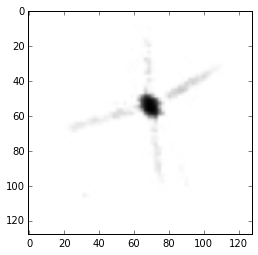

In [32]:
imgplot = plt.imshow(augFunc(img))
imgplot.set_cmap('gray')

In [33]:
augFunc2 = augment.ParallelRandomAugment([{'resize':(30,30)}, {'shape':(30,30),'dynamic_shapefix':1}],
                                         flip=1, shear=5, rotate=-1, scale=0.1, scale_asym=0.04, noise=0.0001, shunt=0.05)

(30, 30)
(30, 30)


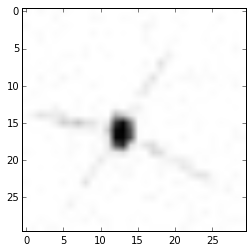

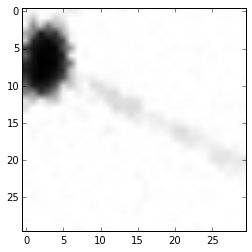

In [68]:
im1,im2 = augFunc2(img)
print im1.shape
print im2.shape
imgplot = plt.imshow(im1)
imgplot.set_cmap('gray')
show()
imgplot = plt.imshow(im2)
imgplot.set_cmap('gray')
show()

In [69]:
settings = utils.Settings('settings.json')

In [71]:
X,y = utils.load_rawdata(settings.image_fnames, classes=settings.classes, verbose=False)

In [276]:
augFunc = augment.RandomAugment(units='float64',
                                flip=1, shear=5, rotate=-1, scale=0.075, scale_asym=0.02, resize=(48,48))

In [277]:
rng = np.random.RandomState(42)

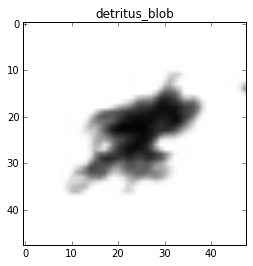

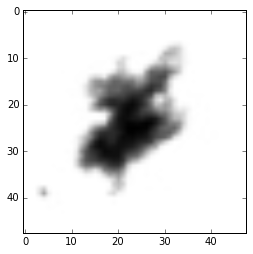

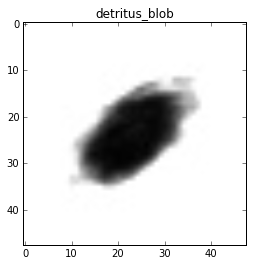

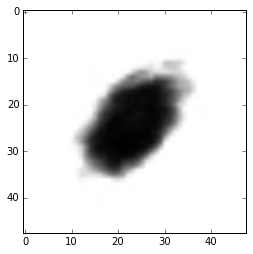

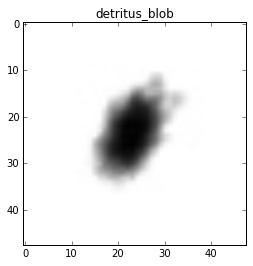

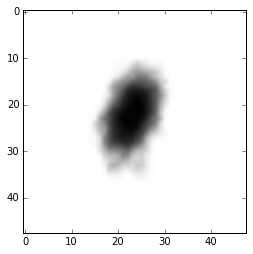

In [285]:
index = rng.random_integers(0, len(X)-1)

imgplot = plt.imshow(image_processing.resize_image(X[index-1],(48,48)))
imgplot.set_cmap('gray')
plt.title(y[index-1])
show()
imgplot = plt.imshow(augFunc(X[index-1]))
imgplot.set_cmap('gray')
show()

imgplot = plt.imshow(image_processing.resize_image(X[index],(48,48)))
imgplot.set_cmap('gray')
plt.title(y[index])
show()
imgplot = plt.imshow(augFunc(X[index]))
imgplot.set_cmap('gray')
show()

imgplot = plt.imshow(image_processing.resize_image(X[index+1],(48,48)))
imgplot.set_cmap('gray')
plt.title(y[index+1])
show()
imgplot = plt.imshow(augFunc(X[index+1]))
imgplot.set_cmap('gray')
show()

In [239]:
augFunc = augment.RandomAugment(units='float64',
                                rotate=[10, 350], resize=(48,48))

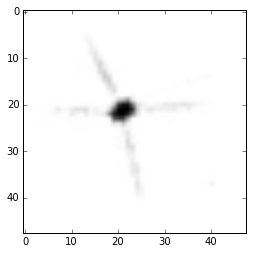

In [254]:
imgplot = plt.imshow(augFunc(img))
imgplot.set_cmap('gray')